In [ ]:
#@title Install Selenium-Profiles

# install
!apt update; apt upgrade; apt autoremove
!pip uninstall -y selenium_profiles
!pip install --upgrade --no-cache-dir selenium_profiles>=2.2.3.3

# restart runtime
import os
os.kill(os.getpid(), 9)

In [ ]:
#@title Install Chrome
from selenium_profiles.utils.installer import install_chromedriver
from selenium_profiles.utils.colab_utils import restart_runtime
print(install_chromedriver())

# restart runtime
restart_runtime()

In [1]:
#@title Start actual driver
from selenium_profiles.driver import driver as mydriver
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By  # locate elements
from selenium_profiles.utils.colab_utils import display, showscreen # virtual display

mydriver = mydriver()
display = display()

display.start_display()
driver = mydriver.start(profiles.Windows())  # or .Android

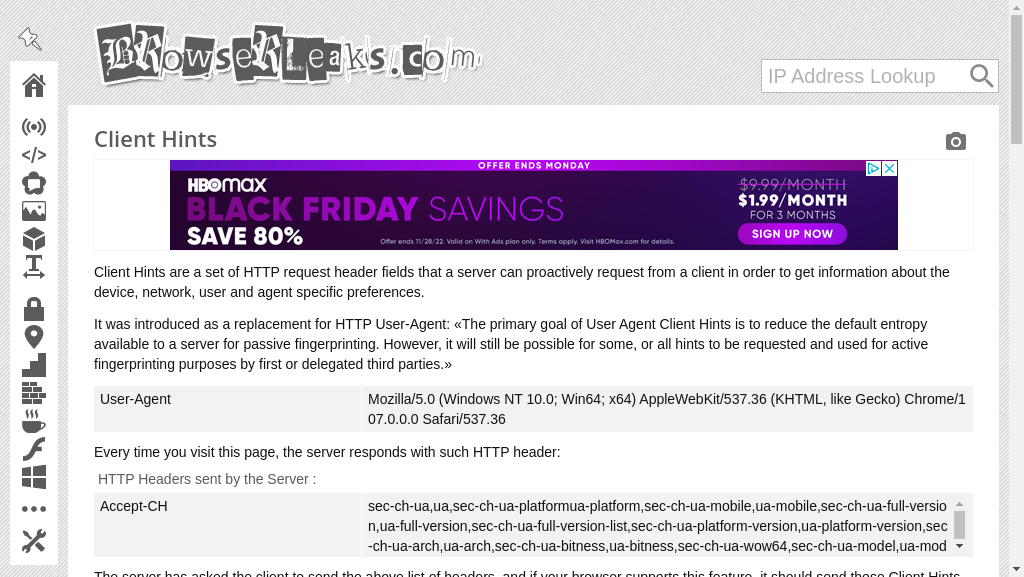

In [6]:
#@title Get URL
driver.get('https://browserleaks.com/client-hints')  # test client hints
showscreen()

In [8]:
#@title Quit driver
driver.quit()
driver.display.stop_display()